### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [2]:
import tensorflow as tf

F:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Collect Fashion mnist data from tf.keras.datasets 

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [6]:
y_train.shape

(60000,)

#### Change train and test labels into one-hot vectors

In [6]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
import keras
y_train_cat = keras.utils.to_categorical(y_train, 10) #converts to 10 categorical variable
y_test_cat = keras.utils.to_categorical(y_test, 10)

Using TensorFlow backend.


In [8]:
y_train_cat.shape

(60000, 10)

In [9]:
y_test_cat.shape

(10000, 10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [0]:
#converting to float types
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
#normalizing data
x_train /= 255
x_test /= 255

In [17]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 784)    # 784 = 28 X 28 the size of each image. 
x_test = x_test.reshape(10000, 784)      # Images are flattended out into a vector of 784 elements

In [26]:
print("train shape ",x_train.shape)
print("test shape ",x_test.shape)

train shape  (60000, 784)
test shape  (10000, 784)


In [0]:
#importing the necessary layers from keras to build the model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam

In [0]:
#initializing model
model = Sequential()

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [0]:
model.add(Dense(784, activation='relu', input_shape=(784,)))   
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.5352 - acc: 0.8119 - val_loss: 0.4304 - val_acc: 0.8438
Epoch 2/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.3784 - acc: 0.8640 - val_loss: 0.3844 - val_acc: 0.8619
Epoch 3/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.3381 - acc: 0.8761 - val_loss: 0.3560 - val_acc: 0.8709
Epoch 4/20
60000/60000 [==============================] - 12s 193us/step - loss: 0.3140 - acc: 0.8851 - val_loss: 0.3314 - val_acc: 0.8822
Epoch 5/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.2970 - acc: 0.8903 - val_loss: 0.3281 - val_acc: 0.8799
Epoch 6/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.2776 - acc: 0.8963 - val_loss: 0.3303 - val_acc: 0.8777
Epoch 7/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.2636 - acc: 0.9024 - val_loss: 0.

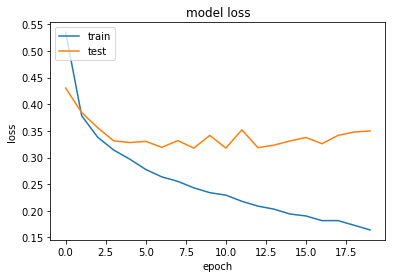

In [46]:
# Adding a softmax layer for output which contains as many neurons as the number of classes (10) which is also the shape of each output vector ( one hot coded)
model.add(Dense(10, activation='softmax')) 

batch_size = 128    # keep in 2^x 
epochs = 20
model.compile(loss='categorical_crossentropy',
              optimizer=adam(),
              metrics=['accuracy'])
    
history = model.fit(x_train, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_cat))

loss,accuracy = model.evaluate(x_test, y_test_cat, verbose=False)

print ('Test loss:', round(loss, 3))
print ('Test accuracy:', round(accuracy, 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

The smaller the loss, the better a job the classifier is at modeling the relationship between the input data and output class labels. 
train loss starts much higher than test, but then decreases rapidly and continues to stay low. Conversely, the loss for test decreases initially but quickly stagnates. In this specific example, train is achieving lower overall loss and is likely a more desirable on classifying other images from the FMNIST dataset. I say "likely" because there is a chance that train has overfit to the training data.

 **Test Accuracy: 89.3 %**
 
**Train Accuracy: 93.72%**